In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/Home/Desktop/Data/2차/CardData_new.csv', encoding = 'cp949')

In [21]:
def get_outlier(df=None, column=None):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  q3 = df.loc[df[column]>0, column].quantile(0.75)
  q1 = df.loc[df[column]>0, column].quantile(0.25)

  IQR = q3 - q1
  
  lowest = q1 - IQR*1.5
  highest = q3 + IQR*1.5
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  print('q3= ', q3, '\nq1= ', q1)
  print('IQR = ', IQR)
  print('lowest = ', lowest)
  print('highest = ', highest)
  print('0 제외하고 따져본 이상치 개수 = ',len(outlier_idx))
    
  
# 확인
get_outlier(df=df, column='이용금액_체크_B0M')

q3=  605447.5 
q1=  66217.5
IQR =  539230.0
lowest =  -742627.5
highest =  1414292.5
0 제외하고 따져본 이상치 개수 =  2651


In [28]:
get_outlier(df=df, column='이용건수_체크_B0M')

q3=  28.0 
q1=  3.0
IQR =  25.0
lowest =  -34.5
highest =  65.5
0 제외하고 따져본 이상치 개수 =  1835


C:\Users\Home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\anaconda3\li

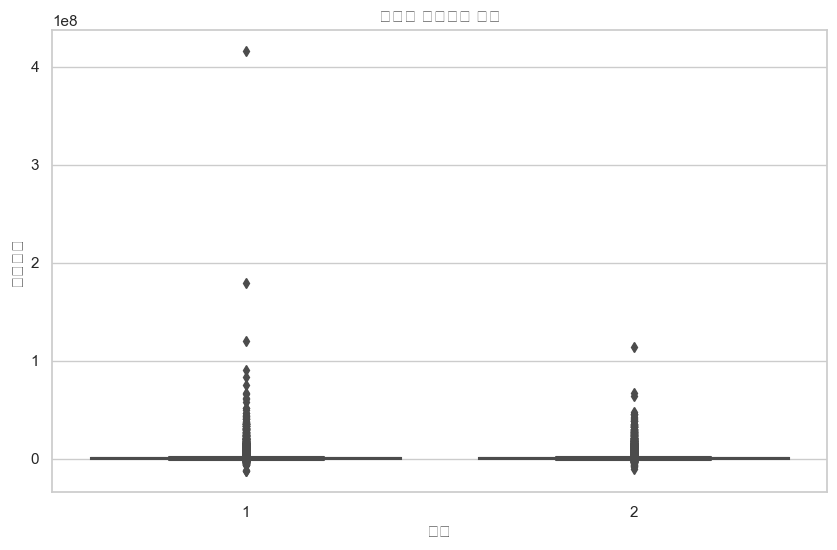

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(x='남녀구분코드', y='이용금액_신용_B0M', data=df)
plt.title('남녀별 이용금액 분포')
plt.xlabel('성별')
plt.ylabel('이용금액')
plt.show()

In [32]:
df['이용금액_신판_R12M'].value_counts()

0           25544
9000         3985
10800        1279
2100          920
1200          580
            ...  
19666652        1
2029700         1
5204906         1
4565455         1
6398850         1
Name: 이용금액_신판_R12M, Length: 242669, dtype: int64

In [67]:
df.loc[df['_1순위신용체크구분'] == '신용','이용금액_신용_R12M'].value_counts()

0           18587
9000         3900
10800        1220
2100          883
1200          533
            ...  
10835340        1
12032950        1
19666652        1
2029700         1
6398850         1
Name: 이용금액_신용_R12M, Length: 238677, dtype: int64

In [70]:
df.loc[(df['_1순위신용체크구분'] == '신용') & (df['이용금액_신용_R12M'] == 0), '고객구분'].value_counts()

34.휴면_9M+       17315
33.휴면_9M-        1235
22.Active_간헐       17
32.휴면_6M-          13
31.휴면_3M            7
Name: 고객구분, dtype: int64

In [71]:
df['이용금액_신판_R6M'].value_counts()

0           38026
3600         4934
1800         1917
5400         1768
1200         1125
            ...  
3149620         1
19387394        1
12367324        1
6643209         1
2338780         1
Name: 이용금액_신판_R6M, Length: 216003, dtype: int64

In [72]:
df.loc[df['_1순위신용체크구분'] == '신용','이용금액_신용_R6M'].value_counts()

0          28612
3600        4836
1800        1826
5400        1687
1200        1054
           ...  
3842380        1
6185167        1
7924530        1
9793348        1
2338780        1
Name: 이용금액_신용_R6M, Length: 215350, dtype: int64

In [73]:
df.loc[(df['_1순위신용체크구분'] == '신용') & (df['이용금액_신용_R6M'] == 0), '고객구분'].value_counts()

34.휴면_9M+       20124
33.휴면_9M-        6312
32.휴면_6M-        2147
22.Active_간헐       22
31.휴면_3M            7
Name: 고객구분, dtype: int64

In [74]:
df['이용금액_신판_R3M'].value_counts()

0          48950
900         9566
2700        2233
600         1063
1500         902
           ...  
3418005        1
2056566        1
474400         1
20190          1
128480         1
Name: 이용금액_신판_R3M, Length: 187659, dtype: int64

In [75]:
df.loc[df['_1순위신용체크구분'] == '신용','이용금액_신용_R3M'].value_counts()

0          37038
900         9365
2700        2119
600          985
1500         879
           ...  
394220         1
530910         1
3170281        1
1890160        1
128480         1
Name: 이용금액_신용_R3M, Length: 189718, dtype: int64

In [76]:
df.loc[(df['_1순위신용체크구분'] == '신용') & (df['이용금액_신용_R3M'] == 0), '고객구분'].value_counts()

34.휴면_9M+       20128
32.휴면_6M-        6975
33.휴면_9M-        6322
31.휴면_3M         3579
22.Active_간헐       34
Name: 고객구분, dtype: int64

In [89]:
df.loc[(df['고객구분'] == '22.Active_간헐'),'고객구분']

29        22.Active_간헐
31        22.Active_간헐
33        22.Active_간헐
35        22.Active_간헐
46        22.Active_간헐
              ...     
299956    22.Active_간헐
299967    22.Active_간헐
299975    22.Active_간헐
299989    22.Active_간헐
299996    22.Active_간헐
Name: 고객구분, Length: 29035, dtype: object

In [91]:
df.loc[df['고객구분'].isin(['34.휴면_9M+','31.휴면_3M','33.휴면_9M-', '32.휴면_6M-']),'고객구분'] = '휴면'

In [100]:
df['고객구분'].unique()

array(['21.Active_연속', '휴면', '22.Active_간헐'], dtype=object)

In [101]:
dormant_group = df[df['고객구분'] == '휴면']
active_continuous_group = df[df['고객구분'] == '21.Active_연속']
active_intermittent_group = df[df['고객구분'] == '22.Active_간헐']

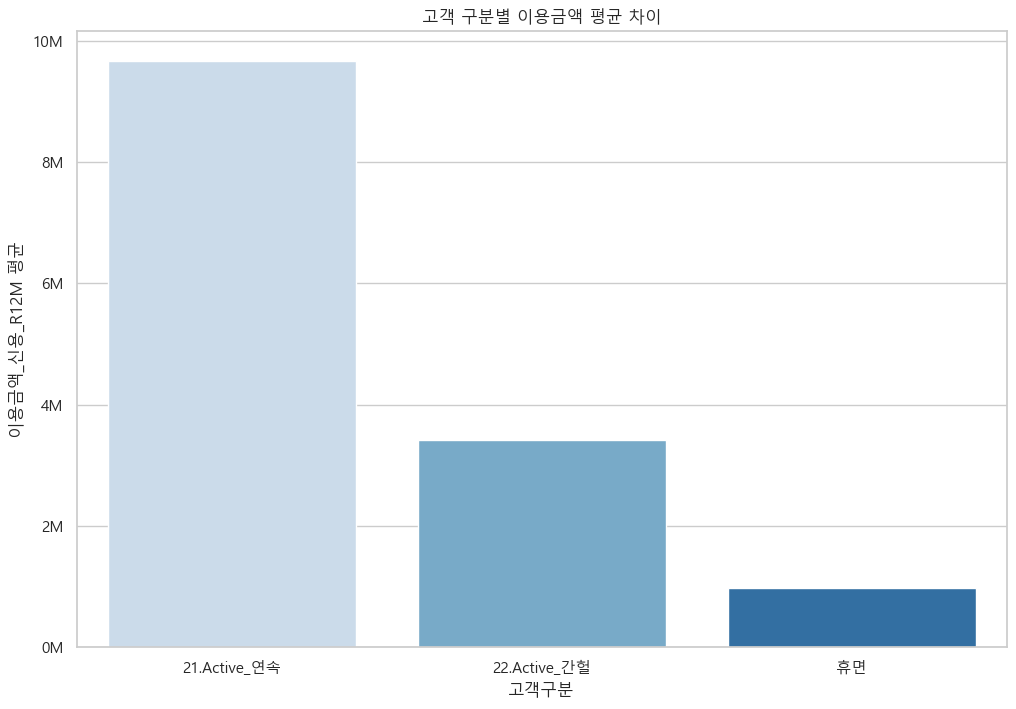

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x/1e6:.0f}M'

plt.figure(figsize=(12, 8))

# 고객 구분별 이용금액 평균 계산
mean_by_category = df.groupby('고객구분')['이용금액_신용_R12M'].mean().reset_index()

# 고객 구분별 금액 평균 차이 시각화
sns.barplot(data=mean_by_category, x='고객구분', y='이용금액_신용_R12M', palette='Blues')

plt.xlabel('고객구분')
plt.ylabel('이용금액_신용_R12M 평균')
plt.title('고객 구분별 이용금액 평균 차이')

# y축 레이블 형식 변경
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [122]:
df['이용금액_신용_R12M'].value_counts().sort_index()

-6467500       1
-5567090       1
-5065690       1
-5045300       1
-4400000       1
              ..
 704874959     1
 875669222     1
 1070504956    1
 2513873068    1
 4852613471    1
Name: 이용금액_신용_R12M, Length: 244501, dtype: int64

In [144]:
df.index[df['이용금액_신용_R12M'] == -5567090]

Int64Index([47242], dtype='int64')

In [136]:
pd.set_option('display.max_columns', None)

In [145]:
df.iloc[47242]

회원번호              OaHafSaJ
남녀구분코드                   2
연령                      57
소지여부_신용                  1
입회일자_신용           20140423
                    ...   
보험콜대상횟수_R12M             0
보험콜통화횟수_R12M             0
보험콜배정후경과월_R12M          12
보험콜통화후경과월_R12M          12
고객구분                    휴면
Name: 47242, Length: 302, dtype: object

In [150]:
df.loc[df['이용금액_신용_R12M'] < 0, '고객구분'].value_counts()

휴면              69
21.Active_연속    49
22.Active_간헐    30
Name: 고객구분, dtype: int64

In [151]:
df.loc[(df['이용금액_신용_R12M'] < 0) & (df['_1순위신용체크구분'] == '체크'), '고객구분'].value_counts()

휴면              9
21.Active_연속    3
22.Active_간헐    3
Name: 고객구분, dtype: int64

In [163]:
df2 = df[df['고객구분'] != '22.Active_간헐']

In [164]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270965 entries, 0 to 299999
Columns: 302 entries, 회원번호 to 고객구분
dtypes: int64(290), object(12)
memory usage: 626.4+ MB


In [166]:
label_encoder = LabelEncoder()
df2['남녀구분코드'] = label_encoder.fit_transform(df2['남녀구분코드'])

C:\Users\Home\AppData\Local\Temp\ipykernel_9520\1764354376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['남녀구분코드'] = label_encoder.fit_transform(df2['남녀구분코드'])


In [167]:
df2['남녀구분코드'].value_counts()

0    142726
1    128239
Name: 남녀구분코드, dtype: int64

In [168]:
df2['자격기준'] = label_encoder.fit_transform(df2['자격기준'])

C:\Users\Home\AppData\Local\Temp\ipykernel_9520\1470834914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['자격기준'] = label_encoder.fit_transform(df2['자격기준'])


In [169]:
df2['자격기준'].value_counts()

5     72488
7     69998
10    57048
0     14198
1     10315
11     9310
3      9243
12     8195
9      6549
2      5767
6      5603
8      1621
4       630
Name: 자격기준, dtype: int64

In [172]:
df2['Life_Stage'] = label_encoder.fit_transform(df2['Life_Stage'])

C:\Users\Home\AppData\Local\Temp\ipykernel_9520\554567197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Life_Stage'] = label_encoder.fit_transform(df2['Life_Stage'])


In [200]:
X = df2[['남녀구분코드','연령','소지여부_신용','자격기준','유효카드수_신용체크','이용금액_R3M_신용체크','Life_Stage',
        '카드이용한도금액']]
y = df2['고객구분']

In [201]:
y = label_encoder.fit_transform(y)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [203]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train,y_train)

ExtraTreesClassifier()

In [204]:
y_pred = ETC.predict(X_test)

In [205]:
accuracy_score(y_pred, y_test)

0.949716753086192

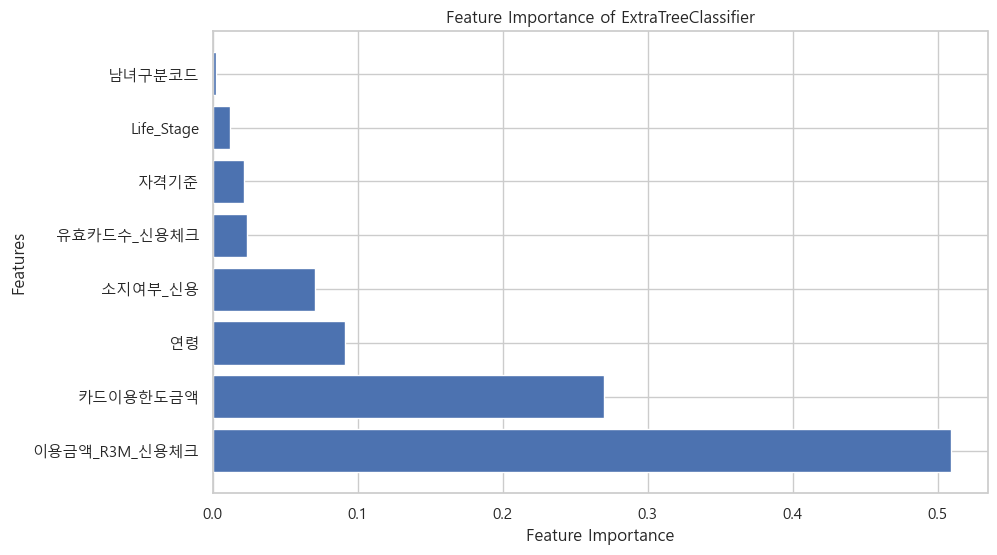

In [207]:
feature_importances = ETC.feature_importances_

importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of ExtraTreeClassifier')
plt.show()

In [209]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [210]:
y_pred = RF.predict(X_test)

In [211]:
accuracy_score(y_pred,y_test)

0.9787610946063144

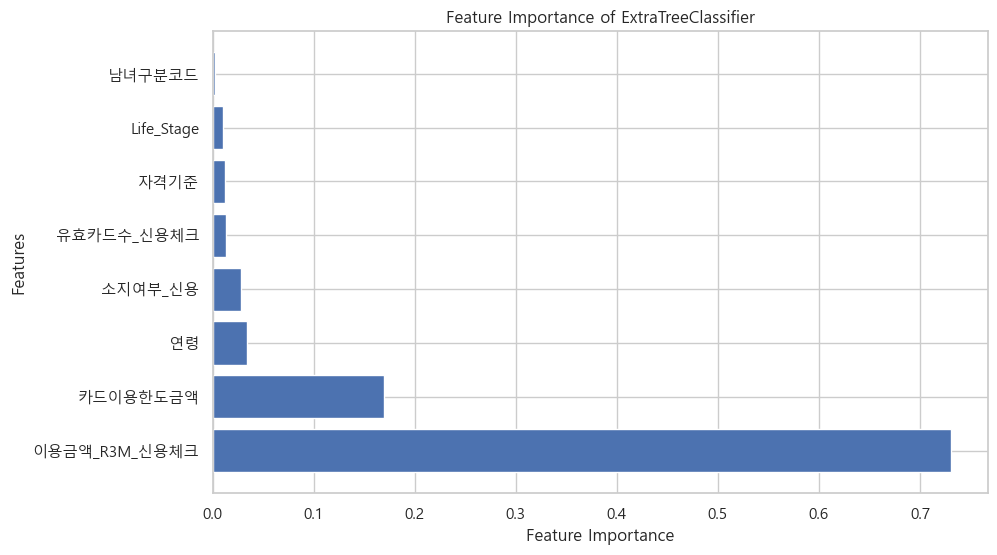

In [212]:
feature_importances = RF.feature_importances_

importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of ExtraTreeClassifier')
plt.show()

In [215]:
df['컨택건수_FDS_B0M'].value_counts().sort_index()

0     299768
1        170
2         35
3         13
4          4
5          4
6          2
9          1
10         1
12         1
18         1
Name: 컨택건수_FDS_B0M, dtype: int64

In [216]:
df['컨택건수_FDS_R6M'].value_counts().sort_index()

0     298711
1        788
2        260
3        118
4         50
5         29
6         18
7          7
8          7
9          5
10         1
11         2
12         1
14         1
15         1
18         1
Name: 컨택건수_FDS_R6M, dtype: int64

In [230]:
df.loc[(df['컨택건수_FDS_R6M'] > 0) & (df['연령'] > 60) , '연령'].value_counts().sum()

161